In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.datasets import cifar10
from keras import models, layers
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load the CIFAR -10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
train_labels[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
test_labels[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [7]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

In [8]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [9]:
train_images[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [15]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

Epoch 1/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7375 - accuracy: 0.3640 - val_loss: 1.4373 - val_accuracy: 0.4858
Epoch 2/20
1250/1250 [==============================] - 23s 19ms/step - loss: 1.4562 - accuracy: 0.4740 - val_loss: 1.3411 - val_accuracy: 0.5214
Epoch 3/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.3759 - accuracy: 0.5054 - val_loss: 1.2996 - val_accuracy: 0.5387
Epoch 4/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.3177 - accuracy: 0.5291 - val_loss: 1.2350 - val_accuracy: 0.5663
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.2718 - accuracy: 0.5459 - val_loss: 1.2146 - val_accuracy: 0.5699
Epoch 6/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.2257 - accuracy: 0.5605 - val_loss: 1.2148 - val_accuracy: 0.5644
Epoch 7/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1887 - accuracy: 0.5763 - val_loss: 1.1191 -

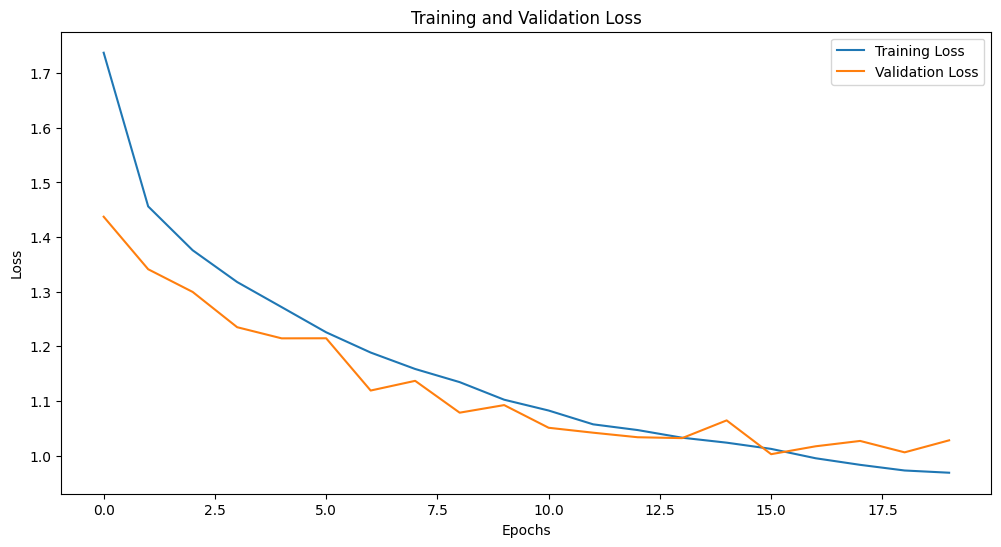

In [16]:
# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.001)')
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Evaluate the model on the train and test data
train_loss, train_accuracy = cnn_model.evaluate(train_images, train_labels)
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)

# Make predictions on the train and test data
train_predictions = cnn_model.predict(train_images)
train_predicted_labels = np.argmax(train_predictions, axis=1)
test_predictions = cnn_model.predict(test_images)
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
train_confusion_mtx = confusion_matrix(train_labels, train_predicted_labels)
test_confusion_mtx = confusion_matrix(test_labels, test_predicted_labels)

# Calculate precision and recall
train_precision = precision_score(train_labels, train_predicted_labels, average='weighted')
train_recall = recall_score(train_labels, train_predicted_labels, average='weighted')
test_precision = precision_score(test_labels, test_predicted_labels, average='weighted')
test_recall = recall_score(test_labels, test_predicted_labels, average='weighted')

print("Train")
print("    Accuracy: {:.2f}%".format(train_accuracy * 100))
print("    Precision: {:.2f}".format(train_precision))
print("    Recall: {:.2f}".format(train_recall))
print("    Confusion Matrix:")
print(train_confusion_mtx)
print()

print("Test")
print("    Accuracy: {:.2f}%".format(test_accuracy * 100))
print("    Precision: {:.2f}".format(test_precision))
print("    Recall: {:.2f}".format(test_recall))
print("    Confusion Matrix:")
print(test_confusion_mtx)

313/313 [==============================] - 1s 5ms/step
Train
    Accuracy: 69.72%
    Precision: 0.70
    Recall: 0.70
    Confusion Matrix:
[[3317  154  330  102  200   38   37   64  490  268]
 [  51 4186   37   37   33    8   55   25  105  463]
 [ 234   45 2870  264  654  315  332  154   66   66]
 [  44   45  366 2465  458  794  520  153   72   83]
 [  92   24  320  276 3581   95  253  289   29   41]
 [  11   19  345  926  416 2797  188  244   20   34]
 [   8   33  224  226  303   61 4057   23   26   39]
 [  28   22  135  245  459  324   63 3617   16   91]
 [ 253  265   85   82   44   22   53   11 3955  230]
 [  74  467   28   66   47   38   68   82  113 4017]]

Test
    Accuracy: 63.69%
    Precision: 0.64
    Recall: 0.64
    Confusion Matrix:
[[605  33  94  21  40   5  12  11 113  66]
 [ 12 782  10   6   7   7  14   8  30 124]
 [ 60   6 489  60 151  74  88  36  18  18]
 [ 12  12  89 421 135 148  96  46  20  21]
 [ 19   6  76  59 649  25  78  77   9   2]
 [ 10   2  79 201  83 511  

Epoch 1/20
1250/1250 [==============================] - 25s 18ms/step - loss: 2.0512 - accuracy: 0.2471 - val_loss: 1.8229 - val_accuracy: 0.3496
Epoch 2/20
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7785 - accuracy: 0.3576 - val_loss: 1.6446 - val_accuracy: 0.4206
Epoch 3/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6524 - accuracy: 0.3988 - val_loss: 1.5547 - val_accuracy: 0.4447
Epoch 4/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5832 - accuracy: 0.4226 - val_loss: 1.4893 - val_accuracy: 0.4693
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.5336 - accuracy: 0.4437 - val_loss: 1.4503 - val_accuracy: 0.4883
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4992 - accuracy: 0.4593 - val_loss: 1.4440 - val_accuracy: 0.4890
Epoch 7/20
1250/1250 [==============================] - 21s 17ms/step - loss: 1.4644 - accuracy: 0.4732 - val_loss: 1.3910 -

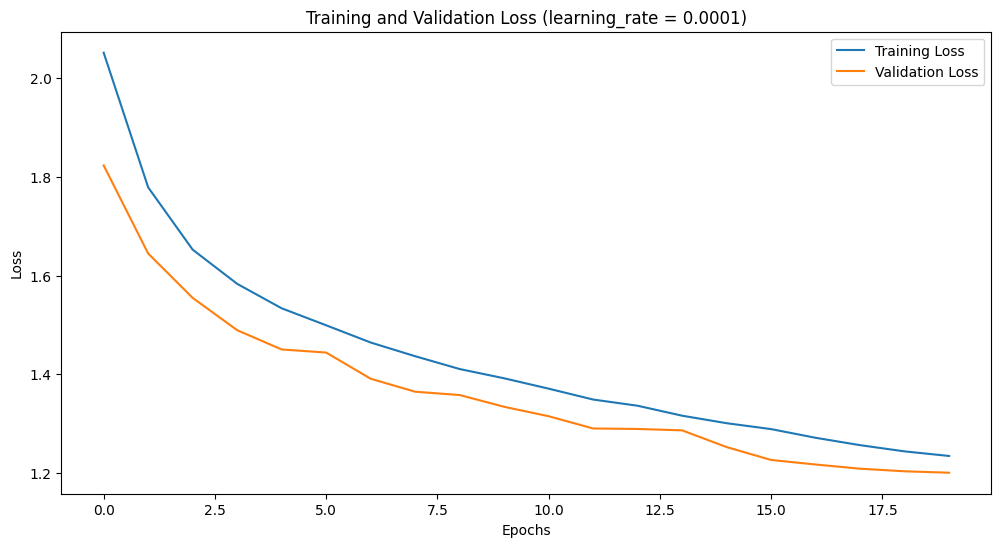

In [19]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.0001)')
plt.show()

Epoch 1/20
1250/1250 [==============================] - 21s 16ms/step - loss: 2.3044 - accuracy: 0.0989 - val_loss: 2.3036 - val_accuracy: 0.1014
Epoch 2/20
1250/1250 [==============================] - 24s 19ms/step - loss: 2.3041 - accuracy: 0.0991 - val_loss: 2.3031 - val_accuracy: 0.0977
Epoch 3/20
1250/1250 [==============================] - 23s 18ms/step - loss: 2.3039 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.1025
Epoch 4/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3042 - accuracy: 0.0984 - val_loss: 2.3036 - val_accuracy: 0.1022
Epoch 5/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3037 - val_accuracy: 0.0980
Epoch 6/20
1250/1250 [==============================] - 20s 16ms/step - loss: 2.3041 - accuracy: 0.1007 - val_loss: 2.3037 - val_accuracy: 0.0980
Epoch 7/20
1250/1250 [==============================] - 22s 17ms/step - loss: 2.3041 - accuracy: 0.0998 - val_loss: 2.3041 -

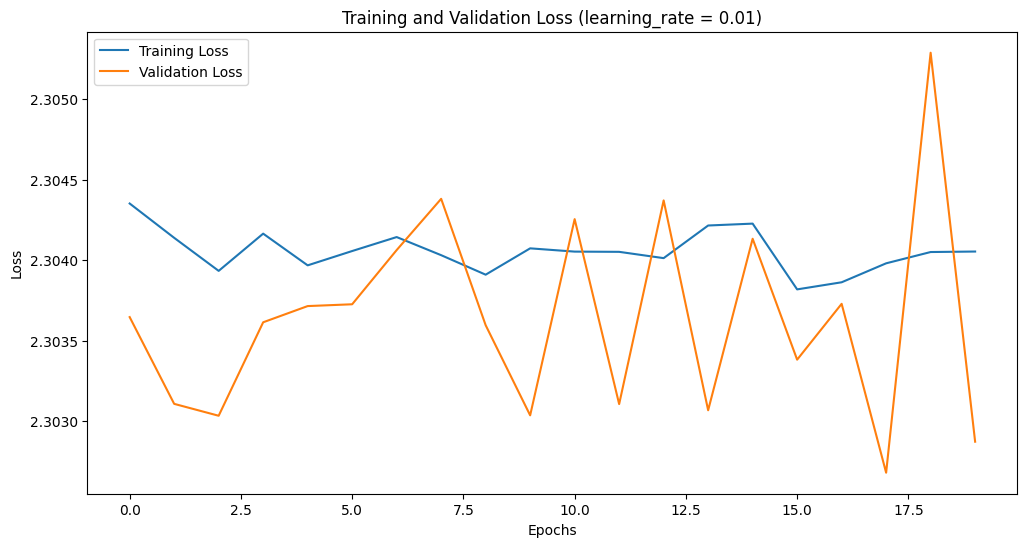

In [20]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.01)')
plt.show()

Epoch 1/20
1250/1250 [==============================] - 26s 20ms/step - loss: 2.3665 - accuracy: 0.1007 - val_loss: 2.3202 - val_accuracy: 0.1022
Epoch 2/20
1250/1250 [==============================] - 23s 19ms/step - loss: 2.3170 - accuracy: 0.0979 - val_loss: 2.3227 - val_accuracy: 0.1025
Epoch 3/20
1250/1250 [==============================] - 22s 18ms/step - loss: 2.3149 - accuracy: 0.1005 - val_loss: 2.3233 - val_accuracy: 0.0952
Epoch 4/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3162 - accuracy: 0.1006 - val_loss: 2.3173 - val_accuracy: 0.1025
Epoch 5/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3152 - accuracy: 0.1009 - val_loss: 2.3102 - val_accuracy: 0.1025
Epoch 6/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3147 - accuracy: 0.0984 - val_loss: 2.3105 - val_accuracy: 0.1003
Epoch 7/20
1250/1250 [==============================] - 21s 17ms/step - loss: 2.3154 - accuracy: 0.0995 - val_loss: 2.3143 -

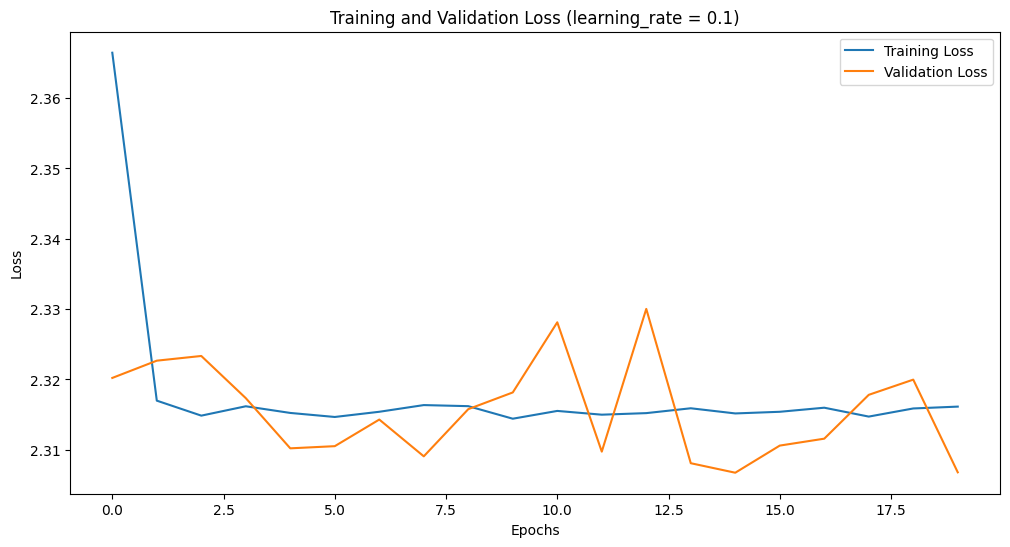

In [21]:
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2,2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dropout(0.3))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.1
optimizer = Adam(learning_rate=learning_rate)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model for 20 epochs
num_epochs = 20
history = cnn_model.fit(train_images,
                        train_labels,
                        epochs=num_epochs,
                        validation_split=0.2)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss (learning_rate = 0.1)')
plt.show()